In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "finger_Tz"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images",'finger_2', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd
import os

FINGER_PATH = os.path.join("datasets", "finger_2")

def load_finger_data(finger_path =FINGER_PATH, index = 1):
    csv_path = os.path.join(finger_path, "%d.csv"%index)
    return pd.read_csv(csv_path)


def merge_data(num = 10):
    data = load_finger_data()
    for i in range(1,num): 
        data = data.append(load_finger_data(index = i+1), ignore_index=True)
    return data

data = merge_data(num = 9)
data.describe()

,p_index,m_index,a1,a2,a3,a4,a5,Fy,Fx,Fz,Ty,Tx,Tz
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,5.500000,5.000000,777.392929,944.621212,738.275758,140.796970,692.602020,-0.174233,2.113468,-0.030390,-0.164648,-0.012308,-0.001267
std,2.873733,3.163876,37.219081,65.057266,157.008845,69.290235,162.825268,0.216001,1.579859,0.301207,0.124504,0.018450,0.020845
min,1.000000,0.000000,564.000000,572.000000,79.000000,30.000000,69.000000,-1.261320,-0.040090,-0.866180,-0.428004,-0.104221,-0.060092
25%,3.000000,2.000000,785.000000,957.000000,789.000000,66.000000,721.250000,-0.240590,0.638078,-0.223930,-0.271254,-0.017481,-0.011247
50%,5.500000,5.000000,787.000000,969.000000,797.000000,165.500000,768.000000,-0.095840,2.028080,-0.046680,-0.157334,-0.005086,-0.001218
75%,8.000000,8.000000,790.000000,971.000000,804.000000,205.000000,772.000000,-0.040547,3.457330,0.164820,-0.048062,-0.001445,0.011317
max,10.000000,10.000000,805.000000,975.000000,823.000000,231.000000,779.000000,0.068160,5.526910,0.981820,0.008064,0.007934,0.044338


Saving figure attribute_histogram_plots


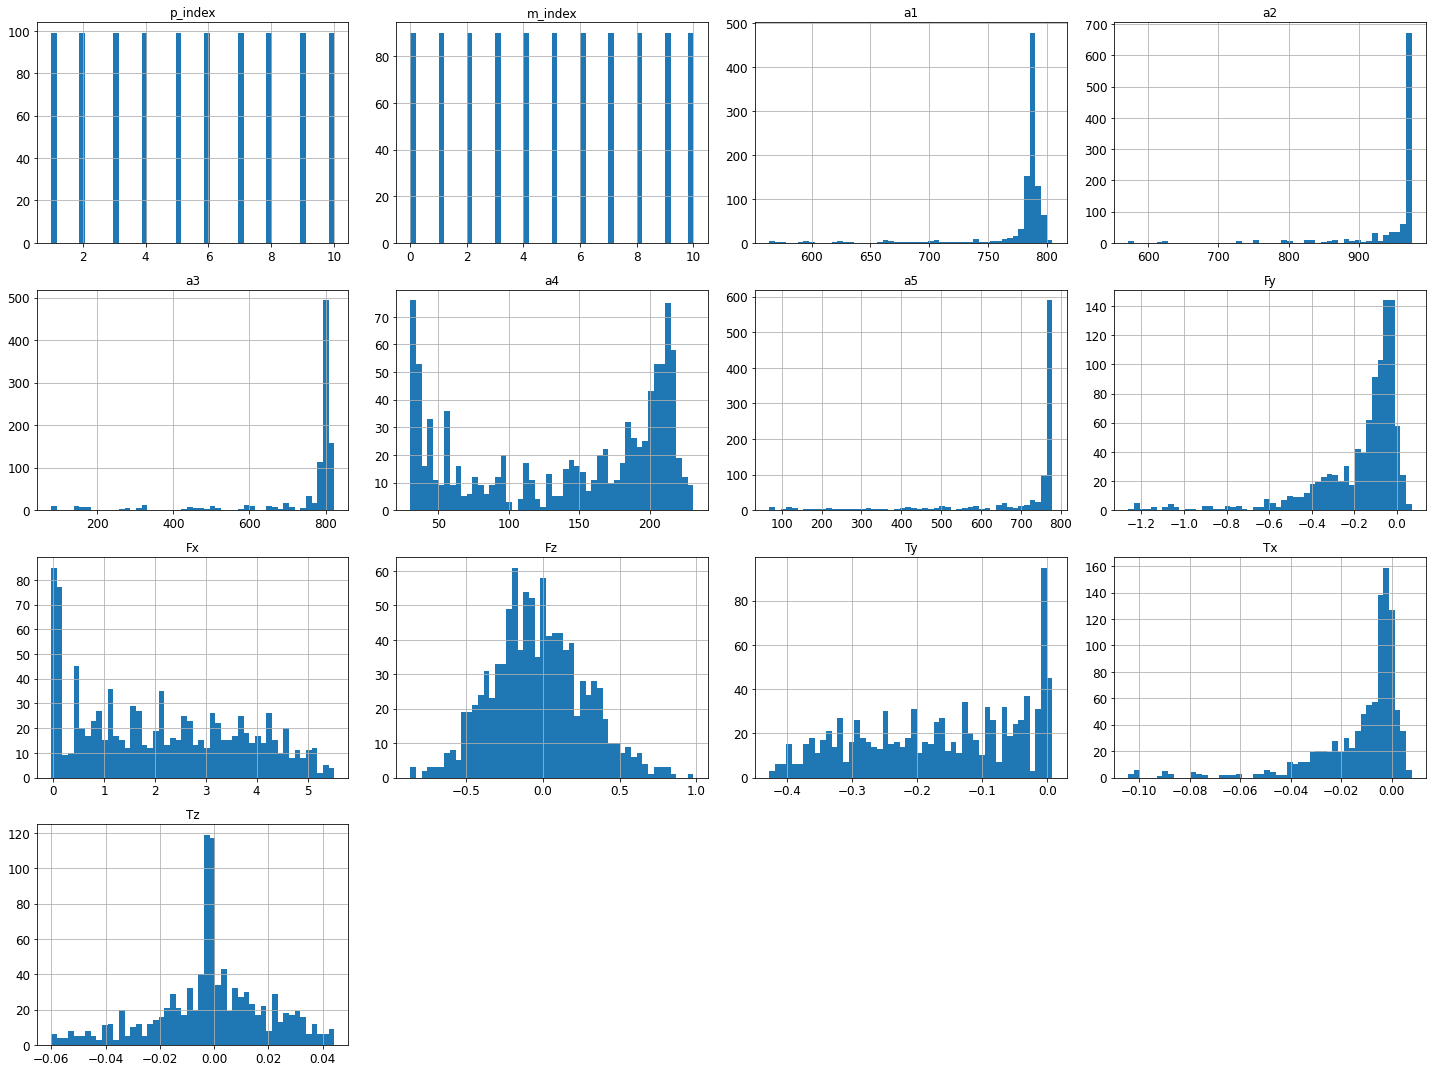

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

<AxesSubplot:>

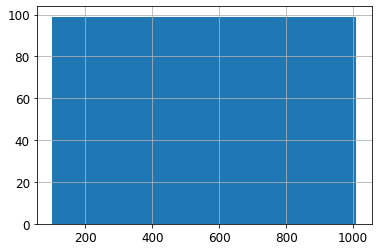

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

data["index"] = data['p_index']*100+data['m_index']
data['index'].hist()

In [7]:

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["index"]):
    data_train = data.loc[train_index]
    data_test = data.loc[test_index]

In [8]:
for set_ in (data_train, data_test):
    set_.drop("index", axis=1, inplace=True)

In [9]:
finger = data_train.copy()

Saving figure bad_visualization_plot


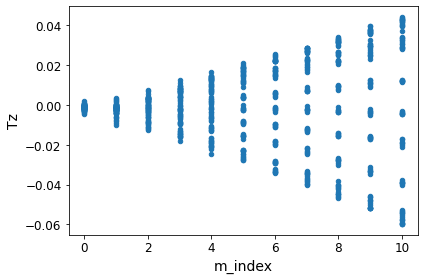

In [10]:
finger.plot(kind="scatter", x="m_index", y="Tz")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot_p_index


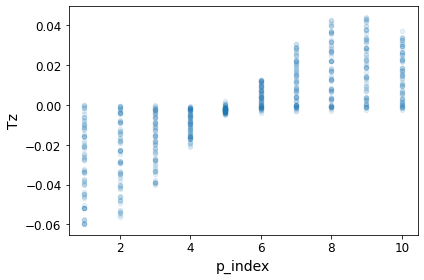

In [11]:
finger.plot(kind="scatter", x="p_index", y="Tz",alpha=0.1)
save_fig("better_visualization_plot_p_index")

Saving figure better_visualization_plot_m_index


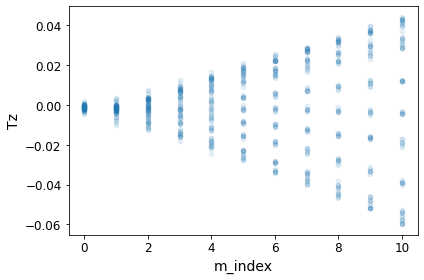

In [12]:
finger.plot(kind="scatter", x="m_index", y="Tz",alpha=0.1)
save_fig("better_visualization_plot_m_index")

Saving figure scatter_matrix_plot


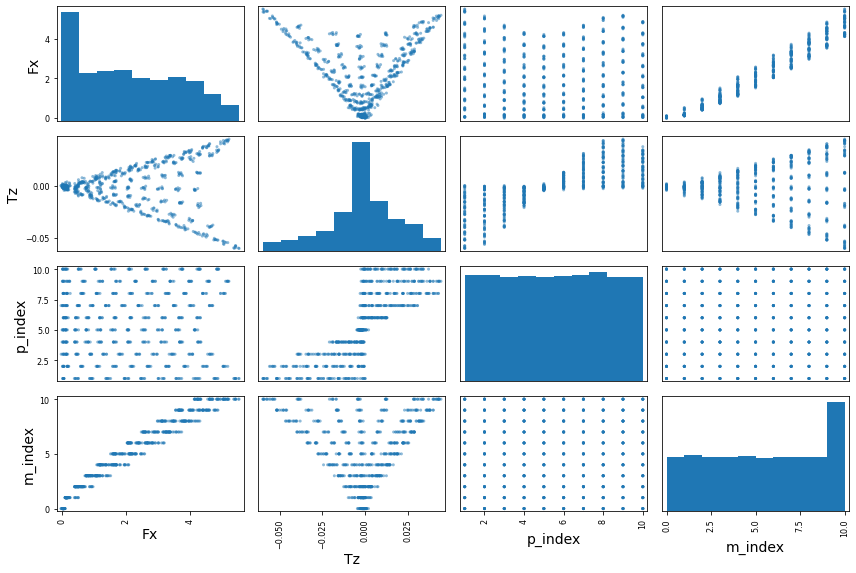

In [13]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Fx", "Tz", "p_index",
              "m_index"]
scatter_matrix(finger[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

# Prepare the data 


In [14]:
finger = data_train.drop(['p_index','m_index','Fx','Fy','Fz','Tx','Ty','Tz'], axis=1) # drop labels for training set
finger_label = data_train["Tz"].copy()
finger_label

280    0.003651
724    0.009618
826    0.001659
650   -0.000223
442   -0.009726
         ...   
857    0.042648
136   -0.012495
111   -0.007789
102    0.005900
70     0.007694
Name: Tz, Length: 792, dtype: float64

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

full_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

finger_pre = full_pipeline.fit_transform(finger)
finger_pre

array([[ 0.31151455,  0.42137596,  0.34729675, -1.37277741,  0.468094  ],
       [ 0.31151455,  0.11170744, -2.60518455, -1.57538844,  0.32692882],
       [ 0.47146237,  0.40589253,  0.44932634,  0.84147166,  0.49878208],
       ...,
       [ 0.41814643,  0.42137596,  0.37280415,  1.07302712,  0.46195638],
       [ 0.28485658,  0.40589253,  0.37280415,  1.02961047, -0.21318143],
       [ 0.28485658,  0.40589253,  0.48121059, -1.22805525,  0.4312683 ]])

# Select and train a model

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(finger_pre, finger_label)

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error

finger_predictions = lin_reg.predict(finger_pre)
lin_mse = mean_squared_error(finger_label, finger_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.006484942686027649

In [18]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(finger_pre, finger_label)

DecisionTreeRegressor(random_state=42)

In [19]:
finger_predictions = tree_reg.predict(finger_pre)
tree_mse = mean_squared_error(finger_label, finger_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

7.368862937608902e-05

# Fine-ture

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, finger_pre, finger_label,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [21]:

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.00322556 0.00217826 0.00319301 0.00309569 0.00241865]
Mean: 0.00282223447952089
Standard deviation: 0.00043646538001470474


In [22]:
lin_scores = cross_val_score(lin_reg, finger_pre, finger_label,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.00658006 0.00629151 0.00644957 0.00662317 0.00677546]
Mean: 0.006543953734569749
Standard deviation: 0.00016359245661918393


In [23]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(finger_pre, finger_label)

RandomForestRegressor(random_state=42)

In [24]:
finger_predictions = forest_reg.predict(finger_pre)
forest_mse = mean_squared_error(finger_label, finger_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0007711396948169491

In [25]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.00226151 0.00182473 0.00286376 0.00212748 0.0020793 ]
Mean: 0.0022313558111359925
Standard deviation: 0.0003464396446506192


In [26]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(finger_pre, finger_label)
finger_predictions = svm_reg.predict(finger_pre)
svm_mse = mean_squared_error(finger_label, finger_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.02183090560065079

In [27]:
svm_scores = cross_val_score(svm_reg, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [0.02119732 0.02331066 0.02056864 0.02259687 0.02152915]
Mean: 0.021840527325011787
Standard deviation: 0.0009860753280558033


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'bootstrap': [True],'n_estimators': [3, 10, 30,100], 'max_features': [2,3,4,5]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10,30,100], 'max_features': [2, 3,4,5]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(finger_pre, finger_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'bootstrap': [True], 'max_features': [2, 3, 4, 5],
                          'n_estimators': [3, 10, 30, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 5],
                          'n_estimators': [3, 10, 30, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
grid_search.best_params_


{'bootstrap': False, 'max_features': 2, 'n_estimators': 100}

In [30]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=2, random_state=42)

In [31]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.0031064392645349568 {'bootstrap': True, 'max_features': 2, 'n_estimators': 3}
0.0025552185813818152 {'bootstrap': True, 'max_features': 2, 'n_estimators': 10}
0.0023369578387563593 {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
0.002257502514746617 {'bootstrap': True, 'max_features': 2, 'n_estimators': 100}
0.0027518222077427667 {'bootstrap': True, 'max_features': 3, 'n_estimators': 3}
0.0023608587803647454 {'bootstrap': True, 'max_features': 3, 'n_estimators': 10}
0.002228865441331148 {'bootstrap': True, 'max_features': 3, 'n_estimators': 30}
0.0021937644210649264 {'bootstrap': True, 'max_features': 3, 'n_estimators': 100}
0.0026379192353176654 {'bootstrap': True, 'max_features': 4, 'n_estimators': 3}
0.00235296413765576 {'bootstrap': True, 'max_features': 4, 'n_estimators': 10}
0.0022677810747726594 {'bootstrap': True, 'max_features': 4, 'n_estimators': 30}
0.0022014733370849106 {'bootstrap': True, 'max_features': 4, 'n_estimators': 100}
0.002709548678604855 {'bootstrap

In [32]:
final_model_forest = grid_search.best_estimator_

final_forest_scores = cross_val_score(final_model_forest, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
final_forest_rmse_scores = np.sqrt(-final_forest_scores)
display_scores(final_forest_rmse_scores)

Scores: [0.00200744 0.00186691 0.00239773 0.00213003 0.00204634]
Mean: 0.002089694021370713
Standard deviation: 0.00017594928510659367


In [33]:
final_model_forest = grid_search.best_estimator_


X_test = data_test.drop(['p_index','m_index','Fx','Fy','Fz','Tx','Ty','Tz'], axis=1)
y_test = data_test["Tz"].copy()

X_test_pre = full_pipeline.transform(X_test)
final_forest_predictions = final_model_forest.predict(X_test_pre)

final_forest_mse = mean_squared_error(y_test, final_forest_predictions)
final_forest_rmse = np.sqrt(final_forest_mse)

In [34]:
final_forest_rmse

0.001789065421145724

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [1, 10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(finger_pre, finger_label)

Fitting 5 folds for each of 51 candidates, totalling 255 fits
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.0s
[CV] C=10.0, kernel=linear ...........................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=10.0, gamma=0.03, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=0.03, kernel=rbf ..................................
[CV] ................... C=10.0, gamma=0.03, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=0.03, kernel=rbf ..................................
[CV] ................... C=10.0, gamma=0.03, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] .

[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=   0.0s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=   0.0s
[CV] C=1000.0, gamma=1.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=1000.0, gamma=1.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=1000.0, gamma=1.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=1000.0, gamma=1.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=1000.0, gamma=1.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=1000.0, gamma=3.0, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 255 out of 255 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid=[{'C': [1, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [36]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

0.021862776090588013

In [37]:
final_model_svm = grid_search.best_estimator_

final_svm_scores = cross_val_score(final_model_svm, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
final_svm_rmse_scores = np.sqrt(-final_svm_scores)
display_scores(final_svm_rmse_scores)

Scores: [0.02119732 0.02331066 0.02056864 0.02259687 0.02152915]
Mean: 0.021840527325011787
Standard deviation: 0.0009860753280558033


In [38]:
final_model_svm = grid_search.best_estimator_


X_test = data_test.drop(['p_index','m_index','Fx','Fy','Fz','Tx','Ty','Tz'], axis=1)
y_test = data_test["Tz"].copy()

X_test_pre = full_pipeline.transform(X_test)
final_svm_predictions = final_model_svm.predict(X_test_pre)

final_svm_mse = mean_squared_error(y_test, final_svm_predictions)
final_svm_rmse = np.sqrt(final_svm_mse)

In [39]:
final_svm_rmse

0.021819963858418893

# Result

In [40]:
rmse = [lin_rmse,tree_rmse,forest_rmse,svm_rmse,0,0]

rmse_scores = [lin_rmse_scores.mean(),tree_rmse_scores.mean(),forest_rmse_scores.mean(),svm_rmse_scores.mean(),final_forest_rmse_scores.mean(),final_svm_rmse_scores.mean()]
rmse,rmse_scores
rmse_test = [0,0,0,0,final_forest_rmse,final_svm_rmse]

In [41]:
result = pd.DataFrame([rmse,rmse_scores,rmse_test],index = ['rmse','rmse_mean','rmse_test'],
             columns = ['liner','tree','forest','svm','final_forest','final_svm'])
result

,liner,tree,forest,svm,final_forest,final_svm
rmse,0.006485,0.000074,0.000771,0.021831,0.000000,0.000000
rmse_mean,0.006544,0.002822,0.002231,0.021841,0.002090,0.021841
rmse_test,0.000000,0.000000,0.000000,0.000000,0.001789,0.021820


Saving figure result


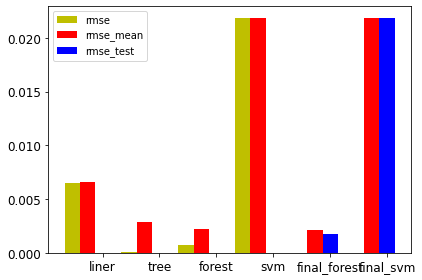

In [42]:
name_list = ['liner','tree','forest','svm','final_forest','final_svm']
num_list_1 = rmse
num_list_2 = rmse_scores
num_list_3 = rmse_test

x =list(range(len(num_list_1)))
total_width, n = 0.8, 3
width = total_width / n
 
plt.bar(x, num_list_1, width=width, label='rmse',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list_2, width=width, label='rmse_mean',tick_label = name_list,fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list_3, width=width, label='rmse_test',tick_label = name_list,fc = 'b')

plt.legend()

save_fig("result")

plt.show()


# Save

In [43]:
import joblib
Prepare_forest = Pipeline([
    ('preparation', full_pipeline),
    ('svm_reg', final_model_forest)
])

joblib.dump(Prepare_forest, "model/finger_2/final_model_forest_Tz.pkl") # DIFF
#...
my_model_loaded = joblib.load("model/finger_2/final_model_forest_Tz.pkl") # DIFF

In [44]:
result.to_csv('images/finger_2/finger_Tz/result.csv',index = False, header = ['liner','tree','forest','svm','final_forest','final_svm'])

In [2]:
import joblib
my_model_loaded = joblib.load("model/finger_2/final_model_forest_Tz.pkl") # DIFF

In [ ]:
my_model_loaded.predict()